# set up

In [219]:
## crawling
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
import time 
## for processing
from konlpy.tag import Hannanum
import re
import pandas as pd
import numpy as np
import csv
import sys
## visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
## interactiveshell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Crawling

In [123]:
## 크롤링 함수
def crawling(url):
    #데이터 담을 empty list
    str_youtube_comments = [] 
    str_youtube_like = [] 
    #chrome driver 
    driver = webdriver.Chrome('/Users/hwangjaewon/Desktop/chromedriver')
    driver.get(url) 
    #dowm the scroll
    last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    while True: 
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
        time.sleep(10) 
        new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_page_height == last_page_height: 
            break 
        else:
            last_page_height = new_page_height 
    #parse the page
    html_source = driver.page_source 
    soup = BeautifulSoup(html_source, 'lxml')
    youtube_comments_1 = soup.select('yt-formatted-string#content-text')
    youtube_like_1 = soup.select('span#vote-count-middle')
    print(youtube_like_1)
    print(youtube_comments_1)
    #function of remain Korean
    def re_sentence(s): 
        a = re.compile('[^ ㄱ-ㅣ가-힣+]')
        result = a.sub('', s) 
        return(result)
    #processing
    for i in range(len(youtube_comments_1)): 
        # print(str_tmp) 
        str_tmp = str(youtube_comments_1[i].text) 
        str_tmp = str_tmp.replace('\n', '') 
        str_tmp = str_tmp.replace('\t', '') 
        str_tmp = str_tmp.replace(' ', '') 
        str_tmp = re_sentence(str_tmp)
        str_youtube_comments.append(str_tmp)
    print(str_youtube_comments)
    for i in range(len(youtube_like_1)): 
        str_tmp = str(youtube_like_1[i].text) 
        str_tmp = str_tmp.replace('\n', '') 
        str_tmp = str_tmp.replace('\t', '') 
        str_tmp = str_tmp.replace(' ', '') 
        str_youtube_like.append(str_tmp)
    print(str_youtube_like)
    # Make DF
    pd_data = {"Comment":str_youtube_comments, "Likes":str_youtube_like } 
    youtube_pd = pd.DataFrame(pd_data)
    driver.close()
    return youtube_pd

In [127]:
## Daily데일리
daily_1=crawling('https://www.youtube.com/watch?v=GYoLCL5czc4')
daily_2=crawling('https://www.youtube.com/watch?v=It49V0PVxkY&t=87s')
daily_3=crawling('https://www.youtube.com/watch?v=RlGKu-H8FSY')
daily_4=crawling('https://www.youtube.com/watch?v=SdAZRcE8jTM')
daily_5=crawling('https://www.youtube.com/watch?v=d0yQE5a2rbc')

[<span class="style-scope ytd-comment-action-buttons-renderer" hidden="" id="vote-count-middle">
    0
  </span>, <span aria-label="좋아요 2개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="좋아요 3개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    3
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span class="style-scope ytd-comment-action-buttons-renderer" hidden="" id="vote-count-middle">
    0
  </span>, <span class="style-scope ytd-comment-action-buttons-renderer" hidden="" id="vote-count-middle">
    0
  </span>, <span aria-label="좋아요 4개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    4
  </span>, <span class="style-scope ytd-comment-action-b

In [128]:
daily_1.to_csv('daily_1.csv')
daily_2.to_csv('daily_2.csv')
daily_3.to_csv('daily_3.csv')
daily_4.to_csv('daily_4.csv')
daily_5.to_csv('daily_5.csv')

In [241]:
daily=pd.concat([daily_1,daily_2,daily_3,daily_4,daily_5], axis=0)
daily['channel']='daily'
daily.head()

,Comment,Likes,channel
0,영상미가너무예뻐요ㅜㅜ공부도열심히하시구넘넘대단하셔요,0,daily
1,데일리님영상만돌려보면서엄청기다렸어요ㅜㅜ너무보고싶었고분위기짱이에요,2,daily
2,데일리님브이로그가제일분위기도예쁘고재밌어요,3,daily
3,언니완전이뻐요ㅠㅠ,1,daily
4,방소개영상찍어주세요,1,daily


---

In [138]:
##은서eunseo
eunseo_1=crawling('https://www.youtube.com/watch?v=TW2kDcAmCKk&t=8s')
eunseo_2=crawling('https://www.youtube.com/watch?v=zTIV3i6QxLE')
eunseo_3=crawling('https://www.youtube.com/watch?v=ZTFEalXrs6A')
eunseo_4=crawling('https://www.youtube.com/watch?v=TXVcrkNf6CU')
eunseo_5=crawling('https://www.youtube.com/watch?v=nP3C_AdXPZs')

[<span aria-label="좋아요 330개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    330
  </span>, <span aria-label="좋아요 2개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="좋아요 20개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    20
  </span>, <span aria-label="좋아요 4개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    4
  </span>, <span aria-label="좋아요 2개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span ari

In [ ]:
eunseo_1.to_csv('eunseo_1.csv')
eunseo_2.to_csv('eunseo_2.csv')
eunseo_3.to_csv('eunseo_3.csv')
eunseo_4.to_csv('eunseo_4.csv')
eunseo_5.to_csv('eunseo_5.csv')

In [242]:
eunseo=pd.concat([eunseo_1,eunseo_2,eunseo_3,eunseo_4,eunseo_5], axis=0)
eunseo['channel']='eunseo'
eunseo.head()

,Comment,Likes,channel
0,무채색갬성미쳤어요진짜화이트부터감성오지고진짜이언니영상환장하겠네,330,eunseo
1,오랜만에영상다시정주행하고있는데색감도분위기도너무이뻐요공부도엄청열심히하시는거같아요은서님...,2,eunseo
2,진짜편집스킬계속느는모습이허우대단하십미댜은서님항상자극받게해주셔서감사합니다,20,eunseo
3,은서님ㅜㅜ무채색감성진짜넘예쁘다구요항상잘보구있고외로울땐은서님영상보면서감동받고그러구있어...,4,eunseo
4,와동갑인데저렇게예쁘게해놓고사는거보면넘존경스러워요,2,eunseo


---

In [146]:
## 필림feellim
feellim_1=crawling('https://www.youtube.com/watch?v=UyySW1OCGwE')
feellim_2=crawling('https://www.youtube.com/watch?v=yPHvn-zrtiI&t=2s')
feellim_3=crawling('https://www.youtube.com/watch?v=aCOk4EXP-3g')
feellim_4=crawling('https://www.youtube.com/watch?v=l4IiyE5dd-A')
feellim_5=crawling('https://www.youtube.com/watch?v=lA6kjuAvoH8')

[<span aria-label="좋아요 6개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    6
  </span>, <span aria-label="좋아요 16개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    16
  </span>, <span aria-label="좋아요 80개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    80
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="좋아요 20개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    20
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="좋아요 2개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="좋아요 1개" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span ari

In [ ]:
feellim_1.to_csv('feellim_1.csv')
feellim_2.to_csv('feellim_2.csv')
feellim_3.to_csv('feellim_3.csv')
feellim_4.to_csv('feellim_4.csv')
feellim_5.to_csv('feellim_5.csv')

In [243]:
feellim=pd.concat([feellim_1,feellim_2,feellim_3,feellim_4,feellim_5], axis=0)
feellim['channel']='feellim'
feellim.head()

,Comment,Likes,channel
0,정말지독한블랙덕후로써몸과마음이편안해지네요감사합니다,6,feellim
1,오ㅓ우저도나름블랙조아한다생각했는데손톱깎이랑고무장갑은상상도못했네여ㅋㅋㅋ,16,feellim
2,블랙성애자로서너무감명깊은공간이네요,80,feellim
3,블랙매력이너무좋아요항상응원합니다,1,feellim
4,어으ㅡ진짜제가원하던집입니다ㅜㅜㅜㅜ대리만족감사해요ㅜㅜㅜㅜㅜㅜ,20,feellim


---

# 채널별 단어 빈도 분석

In [205]:
from konlpy.tag import Komoran
from konlpy.tag import Twitter, Kkma, Mecab, Hannanum
import konlpy
okt = konlpy.tag.Okt()
twitter = Twitter()
kkma = Kkma()
mecab = Mecab()
hannanum = Hannanum()
komoran = Komoran() 

In [206]:
def make_df(channel):
    list_df=list(np.array(channel["Comment"].tolist()))
    em_list=[]
    i=0

    for i in range(len(list_df)):
        a=list_df[i]
        j=0
        for j in range(len(a)):
            em_list.append(a[j][0])
    joined_str = "".join(em_list) 
    
    morph = twitter.pos(joined_str)
    sentences_tag = []
    sentences_tag.append(morph)
    
    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','Adverb']: 
                noun_adj_list.append(word)
    df=pd.DataFrame(noun_adj_list)
    return df

In [207]:
stopword_list = []

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result
                
# 한 글자 단어 제거 함수
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result

def tokenizing_and_cleaning(raw_text):
    token = okt.nouns(raw_text)
    stopwords = remove_stopwords(token)
    meaningful_words = remove_onewords(stopwords)
    data_list.append(meaningful_words)

## daily 채널 단어 빈도수 및 워드클라우드

In [208]:
daily_word=make_df(daily)

data_list = []
daily_word[0].apply(tokenizing_and_cleaning)

0      None
1      None
2      None
3      None
4      None
       ... 
794    None
795    None
796    None
797    None
798    None
Name: 0, Length: 799, dtype: object

In [209]:
# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.
word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

# 데이터프레임으로 만들어준다.
all_token = pd.DataFrame(word_list, columns = ["토큰"])
c=Counter(all_token["토큰"])
most_word=c.most_common(200)
most_token = pd.DataFrame(most_word, columns = ["단어 토큰", "빈도 수"])
word_dict=dict(c.most_common(500))
word_dict

{'영상': 35,
 '감성': 25,
 '정보': 20,
 '진짜': 15,
 '일리': 12,
 '분위기': 12,
 '혹시': 12,
 '책상': 9,
 '공부': 7,
 '오늘': 7,
 '구독': 7,
 '브이': 6,
 '로그': 6,
 '항상': 6,
 '완전': 5,
 '편집': 5,
 '독서': 5,
 '방소': 4,
 '힐링': 4,
 '탁상': 4,
 '시계': 4,
 '가용': 3,
 '감상': 3,
 '정말': 3,
 '스터디': 3,
 '사용': 3,
 '보고': 3,
 '노래': 3,
 '대박': 3,
 '모습': 2,
 '그거': 2,
 '자켓': 2,
 '요나': 2,
 '중간': 2,
 '친구': 2,
 '수능': 2,
 '역시': 2,
 '투어': 2,
 '달력': 2,
 '인스타': 2,
 '요즘': 2,
 '화이팅': 2,
 '집중': 2,
 '숙제': 2,
 '아이패드': 2,
 '어디': 2,
 '이분': 2,
 '제목': 2,
 '자명': 2,
 '동갑': 2,
 '요요': 2,
 '폭발': 2,
 '상미': 1,
 '제일': 1,
 '언니': 1,
 '사시': 1,
 '주심': 1,
 '방이': 1,
 '참고': 1,
 '왜안': 1,
 '제발': 1,
 '바램': 1,
 '공부자': 1,
 '오설록': 1,
 '동백꽃': 1,
 '도공': 1,
 '부자': 1,
 '치마': 1,
 '가을': 1,
 '겨울': 1,
 '거의': 1,
 '롱패딩': 1,
 '썸넬': 1,
 '스트라이프': 1,
 '티셔츠': 1,
 '가존버': 1,
 '알슈': 1,
 '바지': 1,
 '왜저': 1,
 '슈붕': 1,
 '실망': 1,
 '시언': 1,
 '소품': 1,
 '가구': 1,
 '여기': 1,
 '정착': 1,
 '이제': 1,
 '스탈': 1,
 '나이': 1,
 '철학': 1,
 '새내기': 1,
 '생각': 1,
 '나발': 1,
 '공주': 1,
 '시라': 1,
 '디저트': 1,
 '약간': 1,
 '흥행':

<Figure size 7200x7200 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

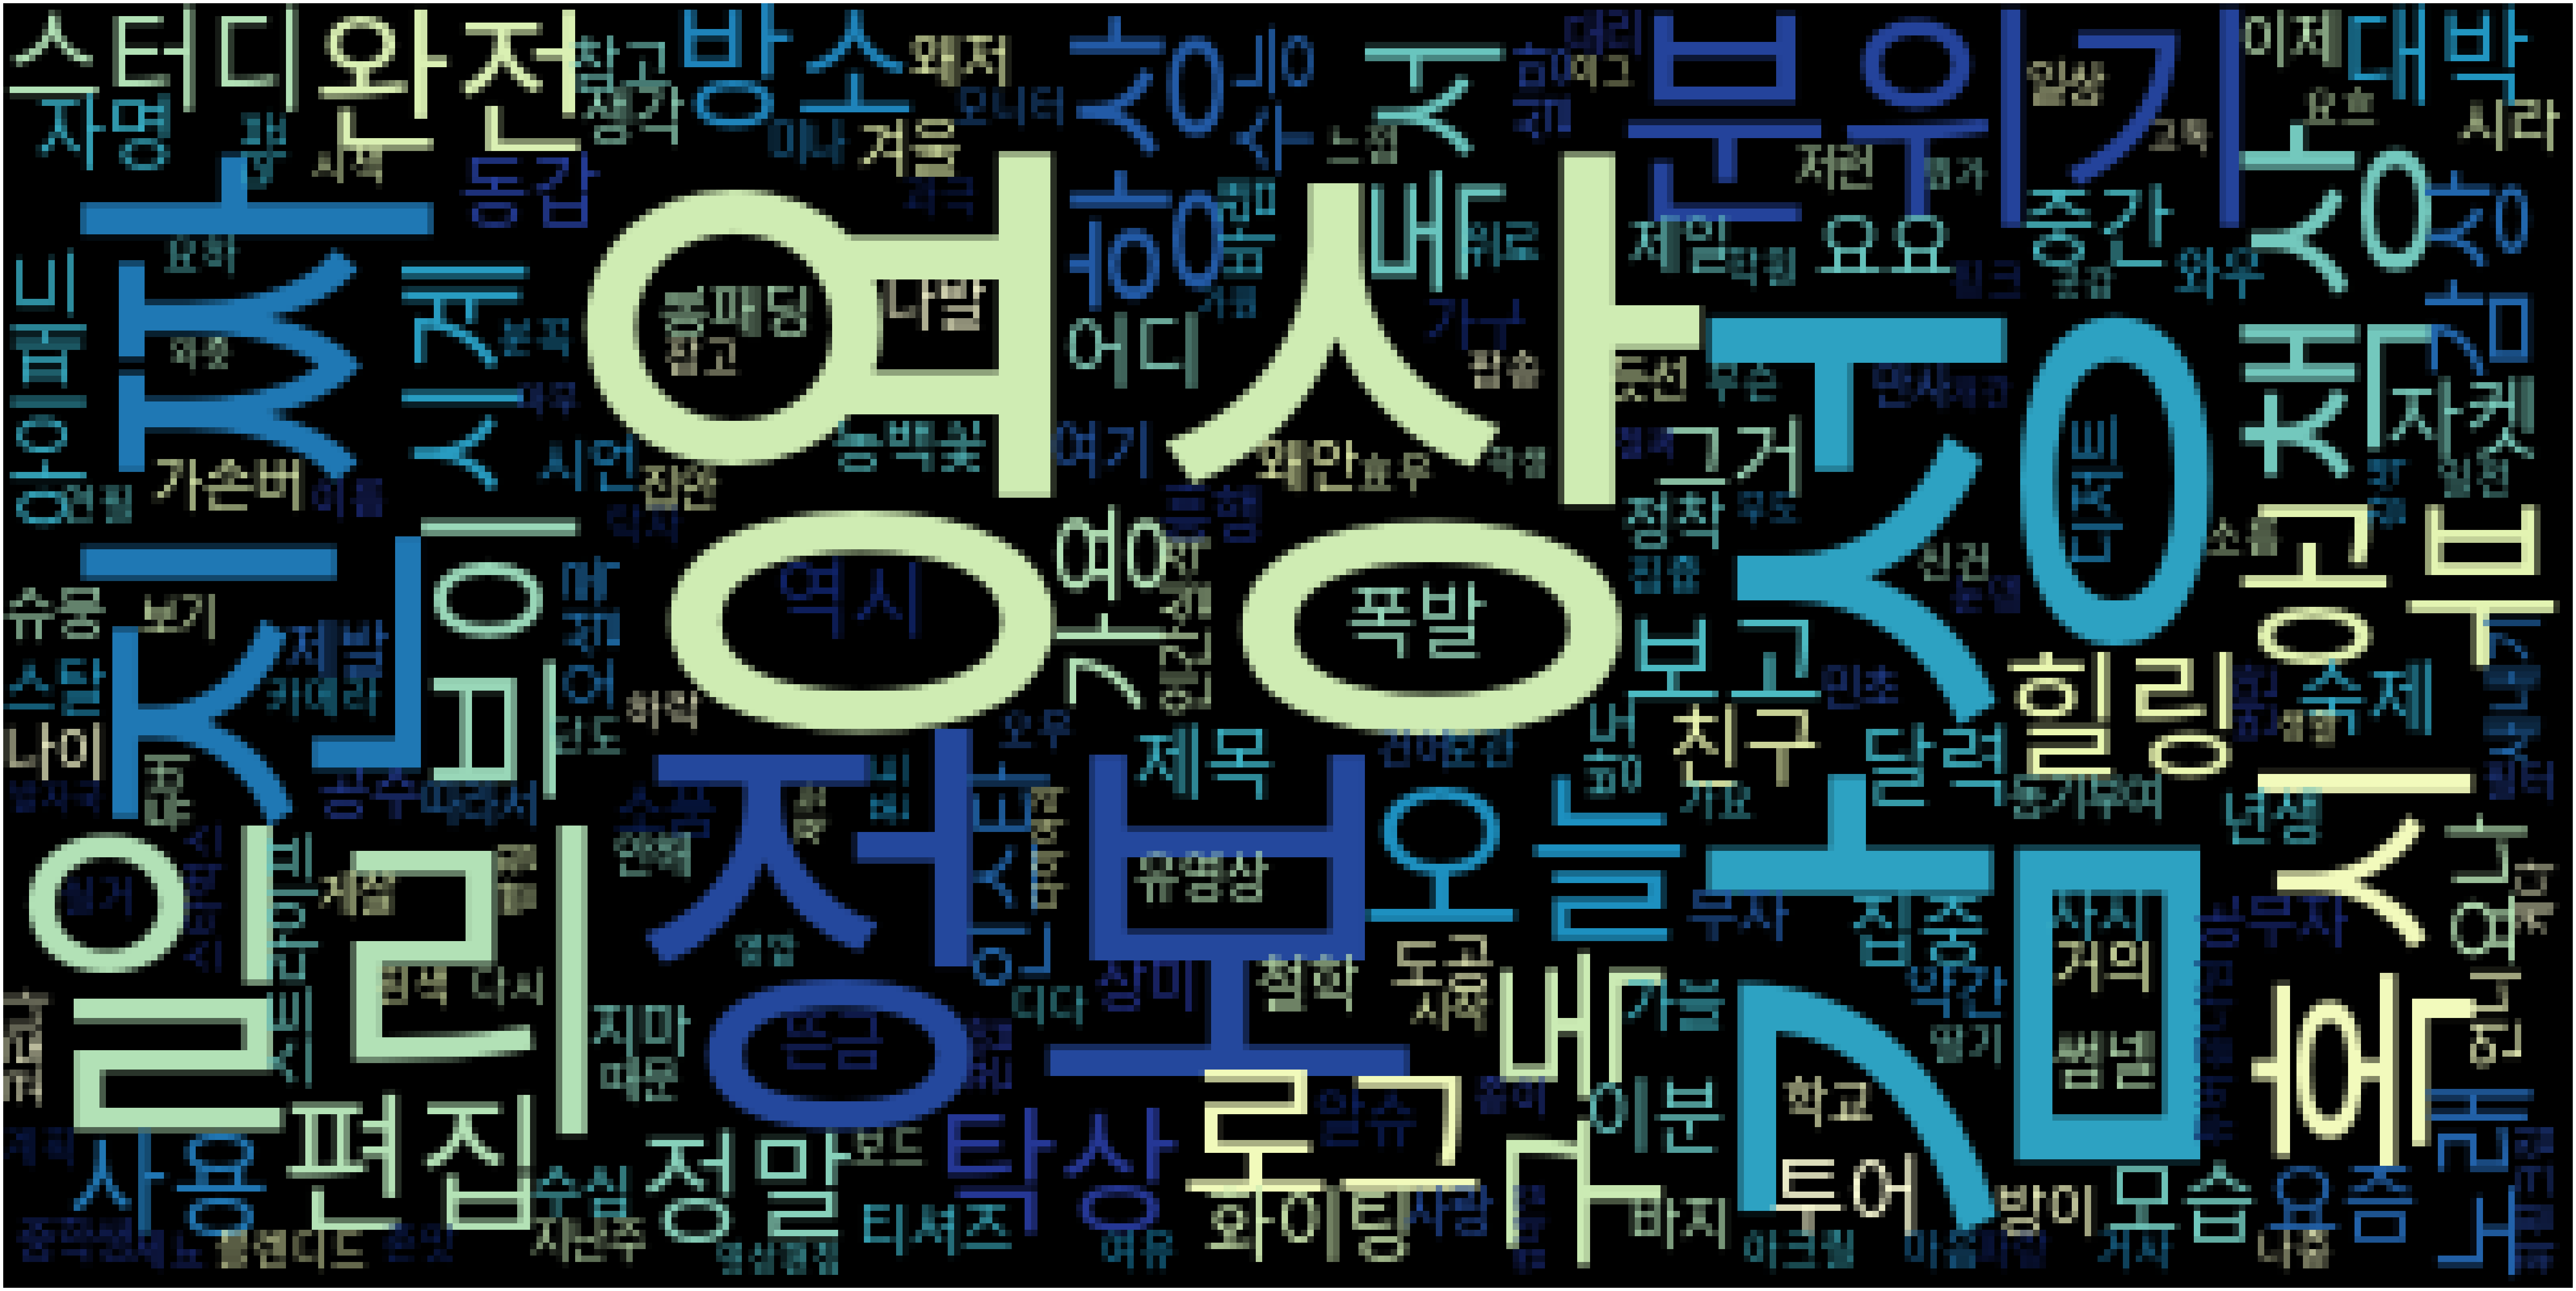

In [210]:
# 워드 클라우드 출력하기
cmap = plt.cm.YlGnBu
wc = WordCloud(font_path = '/Users/hwangjaewon/Downloads/NotoSansCJKkr-hinted/NotoSansMonoCJKkr-Regular.otf',      
               background_color = "black",  
               max_font_size = 100,         
               margin = 0,                  
               colormap = cmap)   
cloud = wc.generate_from_frequencies(word_dict)

#전체 워드클라우드
plt.figure(figsize=(100,100))
plt.imshow(cloud) 
plt.axis("off")
plt.show()

## eunseo 채널 단어 빈도수 및 워드클라우드

In [211]:
eunseo_word=make_df(eunseo)
# 함수 적용
data_list = []
eunseo_word[0].apply(tokenizing_and_cleaning)

0       None
1       None
2       None
3       None
4       None
        ... 
2849    None
2850    None
2851    None
2852    None
2853    None
Name: 0, Length: 2854, dtype: object

In [212]:
# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.
word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

all_token = pd.DataFrame(word_list, columns = ["토큰"])
c=Counter(all_token["토큰"])
most_word=c.most_common(200)
most_token = pd.DataFrame(most_word, columns = ["단어 토큰", "빈도 수"])
word_dict=dict(c.most_common(500))
word_dict

{'영상': 122,
 '은서': 87,
 '진짜': 51,
 '책상': 46,
 '오늘': 38,
 '공부': 32,
 '감성': 24,
 '보고': 22,
 '항상': 19,
 '혹시': 16,
 '정보': 16,
 '편집': 13,
 '졸업': 11,
 '가요': 11,
 '와플': 11,
 '완전': 11,
 '분위기': 10,
 '축하': 10,
 '사랑': 9,
 '동갑': 9,
 '영어': 9,
 '사이즈': 9,
 '독서': 9,
 '계속': 8,
 '구독': 8,
 '매일': 8,
 '정말': 8,
 '독학': 8,
 '무채색': 7,
 '일상': 7,
 '관계대명사': 7,
 '자주': 7,
 '구매': 7,
 '어디': 7,
 '핫트랙스': 7,
 '역시': 7,
 '언니': 6,
 '주행': 6,
 '번영': 6,
 '인스타': 6,
 '요즘': 6,
 '지금': 6,
 '문법': 6,
 '기계': 6,
 '필통': 6,
 '교복': 6,
 '티져': 6,
 '아이패드': 6,
 '처음': 6,
 '존경': 5,
 '브이': 5,
 '다시': 5,
 '대박': 5,
 '부분': 5,
 '얼마': 5,
 '추천': 5,
 '다음': 5,
 '수학': 5,
 '시간': 5,
 '만원': 5,
 '모습': 4,
 '방소': 4,
 '힐링': 4,
 '퀄리티': 4,
 '느낌': 4,
 '수고': 4,
 '걱정': 4,
 '경우': 4,
 '아앙': 4,
 '실력': 4,
 '자막': 4,
 '학년': 4,
 '하나': 4,
 '응원': 4,
 '최고': 4,
 '생각': 4,
 '투명': 4,
 '이번': 4,
 '로그': 4,
 '설탕': 4,
 '반년': 4,
 '보구': 3,
 '그냥': 3,
 '년도': 3,
 '상보': 3,
 '자체': 3,
 '화이팅': 3,
 '정도': 3,
 '도키': 3,
 '공부자': 3,
 '독해': 3,
 '해도': 3,
 '도움': 3,
 '추카': 3,
 '학교': 3,
 '교과서': 3,
 '본인':

<Figure size 7200x7200 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

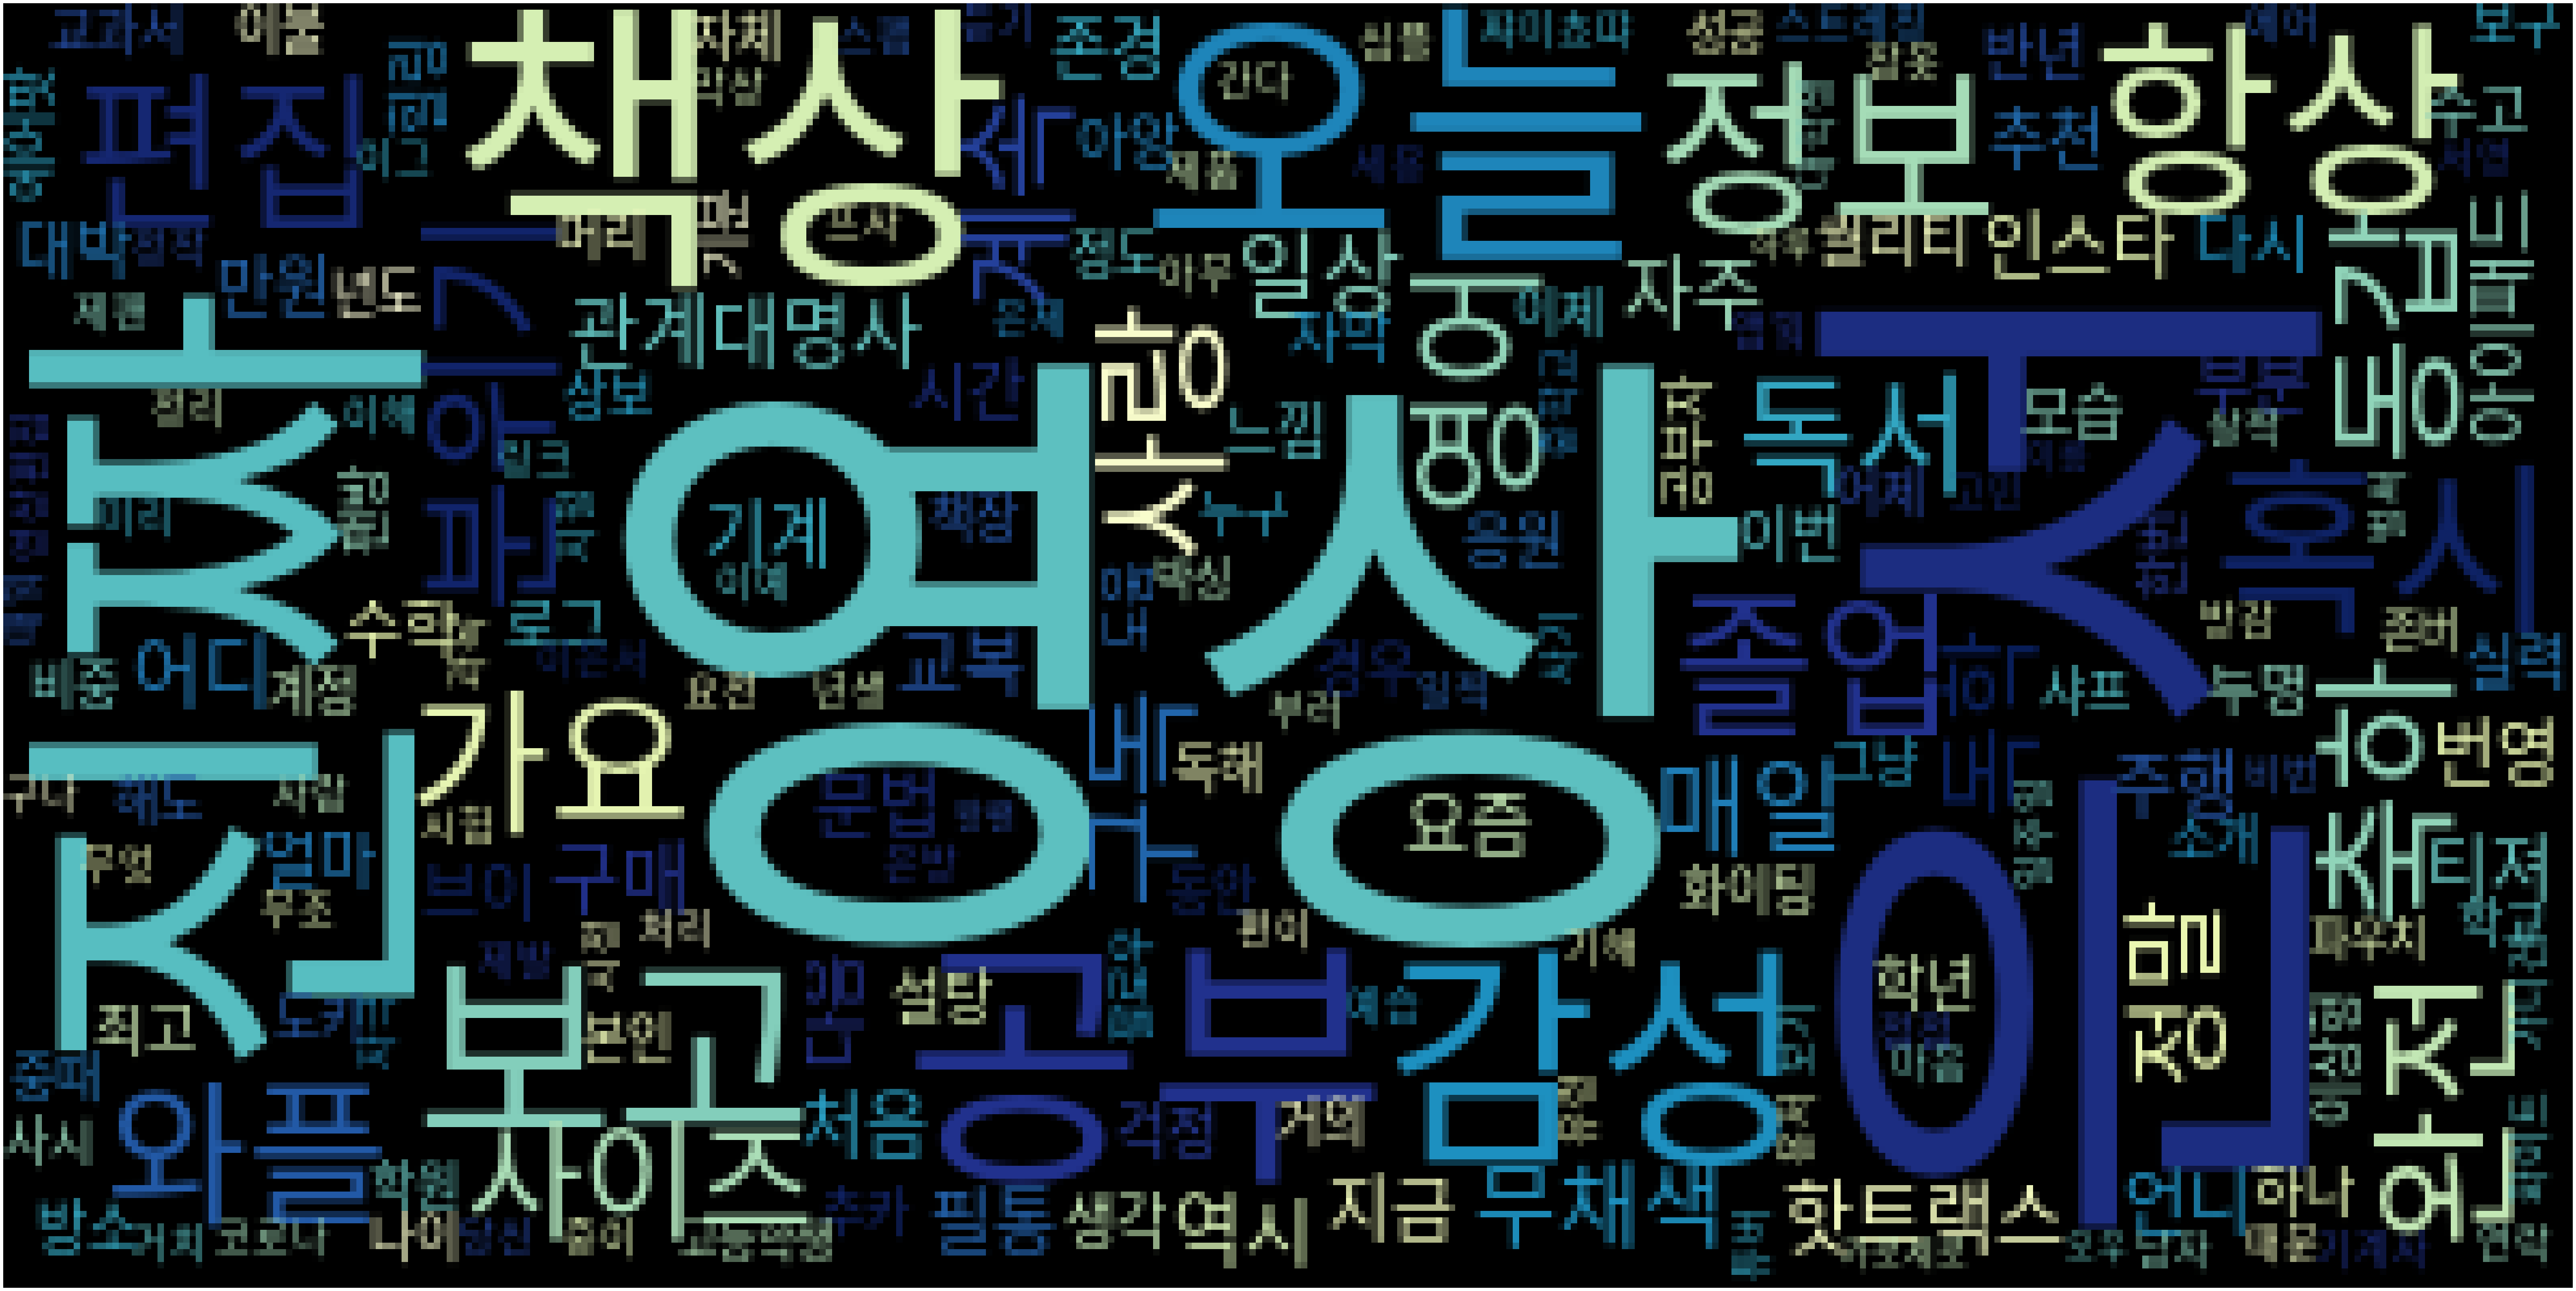

In [213]:
# 워드 클라우드 출력하기
cmap = plt.cm.YlGnBu
wc = WordCloud(font_path = '/Users/hwangjaewon/Downloads/NotoSansCJKkr-hinted/NotoSansMonoCJKkr-Regular.otf',      
               background_color = "black",  
               max_font_size = 100,         
               margin = 0,                  
               colormap = cmap)   
cloud = wc.generate_from_frequencies(word_dict)

#전체 워드클라우드
plt.figure(figsize=(100,100))
plt.imshow(cloud) 
plt.axis("off")
plt.show()

## feellim 채널 단어 빈도수 및 워드클라우드

In [330]:
feellim_word=make_df(feellim)
# 함수 적용
data_list = []
feellim_word[0].apply(tokenizing_and_cleaning)

0      None
1      None
2      None
3      None
4      None
       ... 
694    None
695    None
696    None
697    None
698    None
Name: 0, Length: 699, dtype: object

In [217]:
# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.
word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

all_token = pd.DataFrame(word_list, columns = ["토큰"])
c=Counter(all_token["토큰"])
most_word=c.most_common(200)
most_token = pd.DataFrame(most_word, columns = ["단어 토큰", "빈도 수"])
word_dict=dict(c.most_common(500))
word_dict

{'영상': 26,
 '블랙': 17,
 '보고': 11,
 '감성': 11,
 '브이': 8,
 '로그': 7,
 '진짜': 6,
 '글씨': 6,
 '응원': 5,
 '역시': 5,
 '구독': 5,
 '보기': 4,
 '느낌': 4,
 '완전': 4,
 '채널': 4,
 '정말': 3,
 '덕후': 3,
 '마음': 3,
 '인테리어': 3,
 '감각': 3,
 '자주': 3,
 '자취': 3,
 '화이팅': 3,
 '오늘': 3,
 '소리': 3,
 '엄마': 3,
 '처음': 3,
 '분위기': 3,
 '인스타': 3,
 '휴식': 3,
 '대충': 3,
 '생각': 2,
 '손톱깎이': 2,
 '항상': 2,
 '로서': 2,
 '살림': 2,
 '생활': 2,
 '헤헤': 2,
 '색감': 2,
 '다른': 2,
 '인트': 2,
 '취향': 2,
 '다음': 2,
 '썸네일': 2,
 '김치전': 2,
 '민트': 2,
 '주시': 2,
 '이번': 2,
 '한번': 2,
 '필림': 2,
 '편집': 2,
 '노트': 2,
 '라볶이': 2,
 '단무지': 2,
 '조금': 2,
 '고생': 2,
 '단맛': 2,
 '동영상': 2,
 '로써': 1,
 '나름': 1,
 '고무장갑': 1,
 '상상': 1,
 '성애자': 1,
 '감명': 1,
 '공간': 1,
 '매력': 1,
 '가원': 1,
 '대리': 1,
 '만족': 1,
 '기본': 1,
 '미적': 1,
 '신분': 1,
 '지금': 1,
 '한참': 1,
 '여기': 1,
 '자체': 1,
 '감탄': 1,
 '글씨체': 1,
 '사람': 1,
 '구들': 1,
 '오진': 1,
 '이크': 1,
 '무엇': 1,
 '자극': 1,
 '구도': 1,
 '집중': 1,
 '행복': 1,
 '한일': 1,
 '진심': 1,
 '도나': 1,
 '커서': 1,
 '충격': 1,
 '나생필': 1,
 '찾기': 1,
 '진정': 1,
 '최고': 1,
 '빨강': 1,
 '등등': 1,

<Figure size 7200x7200 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

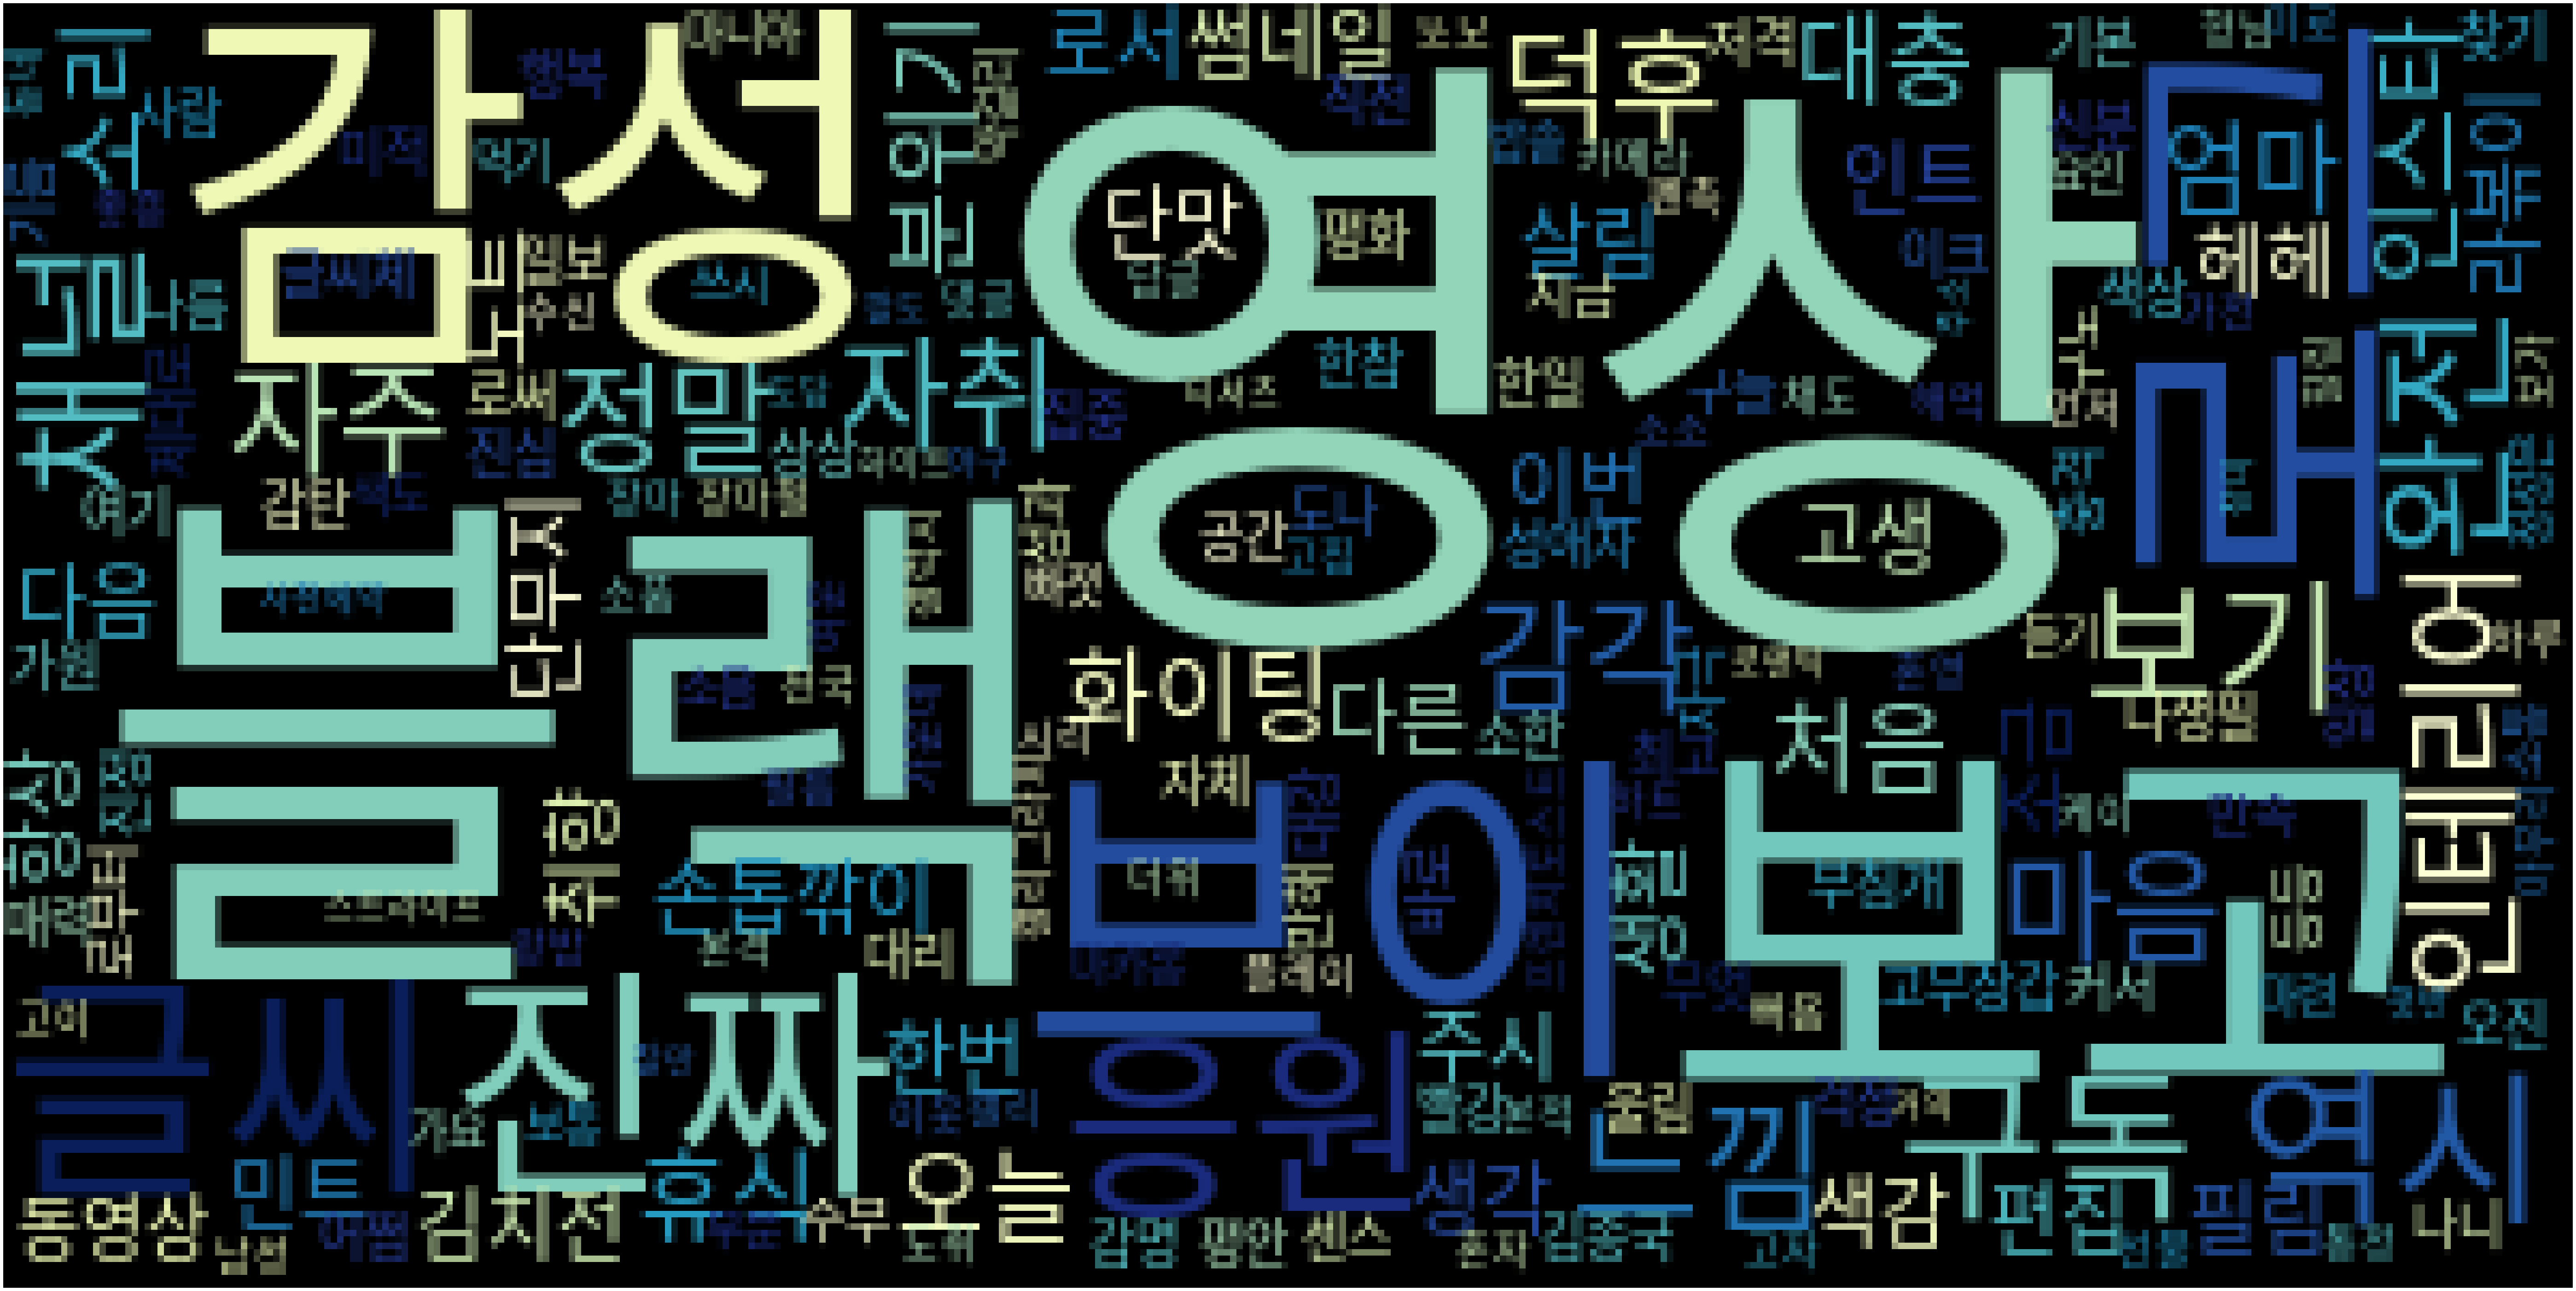

In [218]:
# 워드 클라우드 출력하기
cmap = plt.cm.YlGnBu
wc = WordCloud(font_path = '/Users/hwangjaewon/Downloads/NotoSansCJKkr-hinted/NotoSansMonoCJKkr-Regular.otf',      
               background_color = "black",  
               max_font_size = 100,         
               margin = 0,                  
               colormap = cmap)   
cloud = wc.generate_from_frequencies(word_dict)

#전체 워드클라우드
plt.figure(figsize=(100,100))
plt.imshow(cloud) 
plt.axis("off")
plt.show()

# 감성분석

In [220]:
polarity = pd.read_csv("polarity.csv")
# 긍정사전, 부정사전
positive = polarity[(polarity['max.value']=='POS') & (polarity['max.prop']>=0.5)]
positive = positive.loc[:,['ngram']]

negative = polarity[(polarity['max.value']=='NEG') & (polarity['max.prop']>=0.5)]
negative = negative.loc[:,['ngram']]

pol = positive.append(negative)

In [257]:
def sentences(crawl):
    sentences = []
    for item in crawl:
        morph = mecab.pos(item)
        sentences.append(morph)
    return sentences

In [260]:
def review_score(sentences):
    review_score = pd.DataFrame(columns=['comment','score'])
    for sentence in sentences:
        score=0
        for word in sentence:
            word ='/'.join(word)
            for i in positive['ngram']:
                if (word==i):
                    score += 1
            for i in negative['ngram']:
                if (word==i):
                    score -= 1
        review_score = review_score.append(pd.DataFrame([[sentence, score]],columns=['comment','score']))
    return review_score

In [264]:
def senti(review_score):
    total = len(review_score['score'])
    countpos = review_score.apply(
        lambda review_score:
        True if review_score['score'] >0 else False , axis=1)
    numpos = len(countpos[countpos == True].index)
    countneg= review_score.apply(
        lambda review_score:
        True if review_score['score'] < 0 else False , axis=1)
    numneg = len(countneg[countneg == True].index)
    senti= numpos/(numneg)
    return senti

In [261]:
sentences_d=sentences(daily.Comment.tolist())
sentences_e=sentences(eunseo.Comment.tolist())
sentences_f=sentences(feellim.Comment.tolist())

In [262]:
daily_score=review_score(sentences_d)
eunseo_score=review_score(sentences_e)
feellim_score=review_score(sentences_f)

In [269]:
senti(daily_score)
senti(eunseo_score)
senti(feellim_score)

1.2

0.7586206896551724

1.5833333333333333